In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

white_wine = pd.read_csv('winequality-white.csv', delimiter=';')
print(white_wine.info())
print(white_wine.head())
print(white_wine.duplicated().sum())
white_wine = white_wine.drop_duplicates()
white_wine = white_wine.reset_index(drop=True)
white_wine.reset_index(drop=True)
print(white_wine.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         

# Research question: can wine quality be predicted based on the chemical compounds ? If so, which compounds have the highest predictive quality ?

In [6]:
print(round(white_wine.describe(),2))
print(sorted(white_wine['quality'].unique()))

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count        3961.00           3961.00      3961.00         3961.00   
mean            6.84              0.28         0.33            5.91   
std             0.87              0.10         0.12            4.86   
min             3.80              0.08         0.00            0.60   
25%             6.30              0.21         0.27            1.60   
50%             6.80              0.26         0.32            4.70   
75%             7.30              0.33         0.39            8.90   
max            14.20              1.10         1.66           65.80   

       chlorides  free sulfur dioxide  total sulfur dioxide  density       pH  \
count    3961.00              3961.00               3961.00  3961.00  3961.00   
mean        0.05                34.89                137.19     0.99     3.20   
std         0.02                17.21                 43.13     0.00     0.15   
min         0.01                 2.0

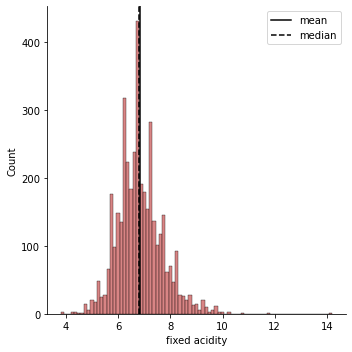

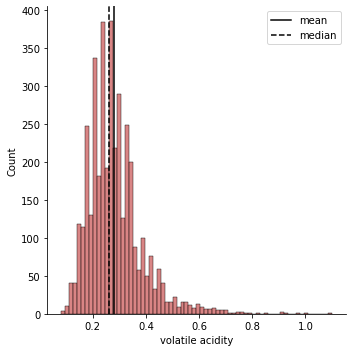

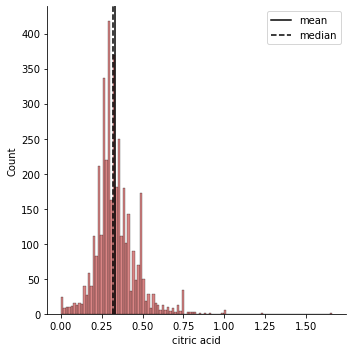

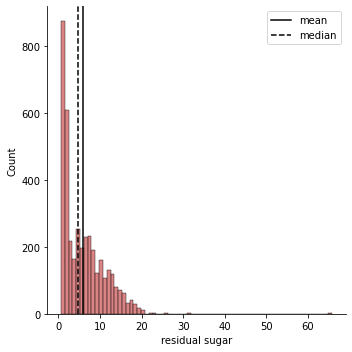

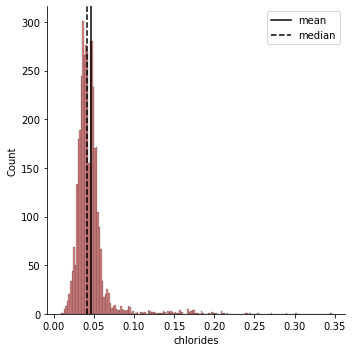

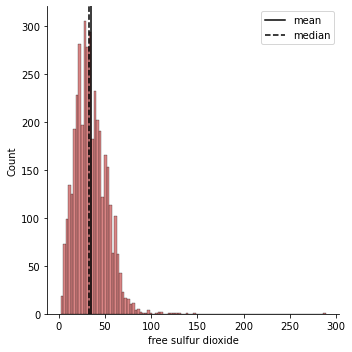

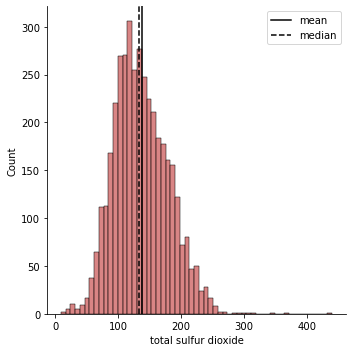

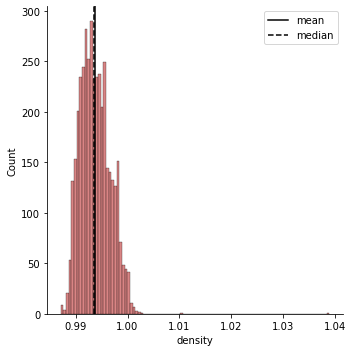

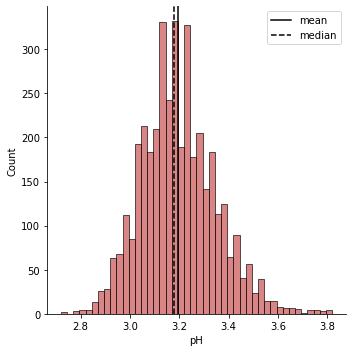

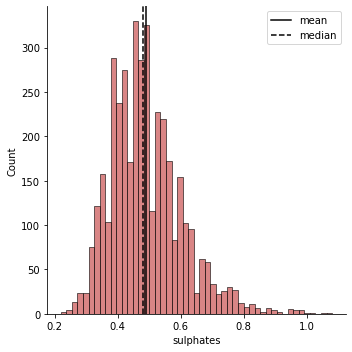

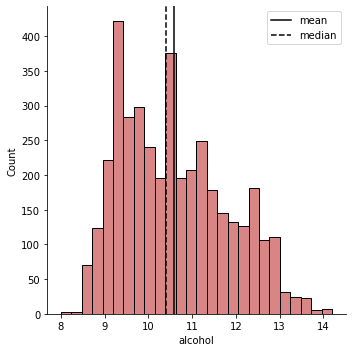

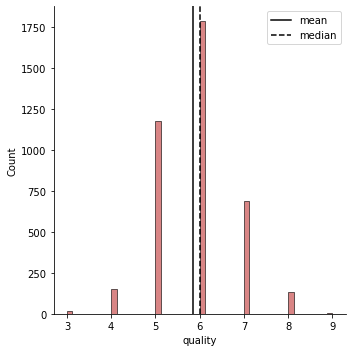

In [7]:
for column in white_wine.columns:
    sns.displot(data=white_wine, x=column, color='indianred')
    plt.axvline(x = white_wine[column].mean(), color='black', label='mean')
    plt.axvline(x = white_wine[column].median(), color='black', linestyle='--', label='median')
    plt.legend()

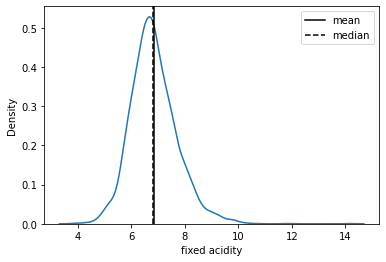

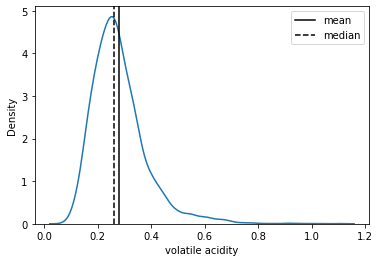

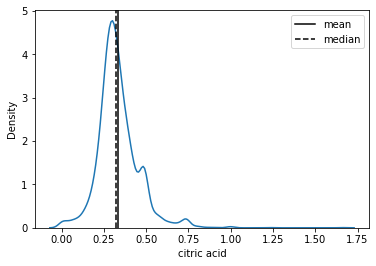

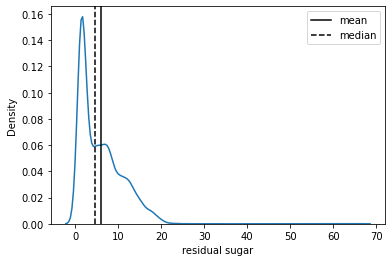

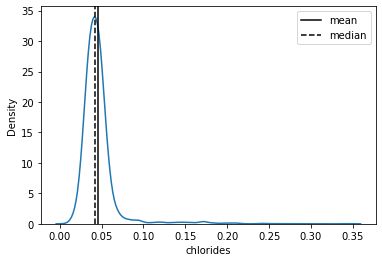

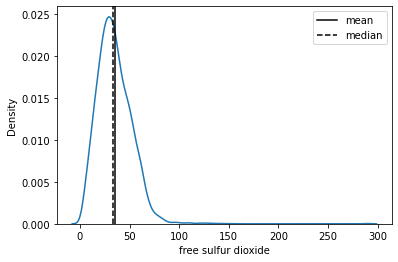

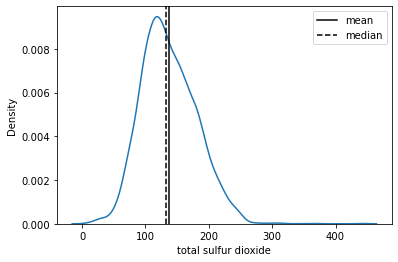

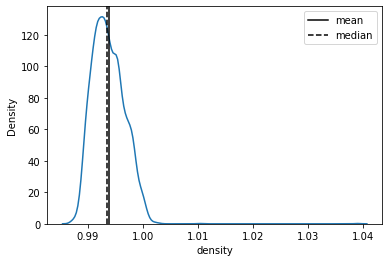

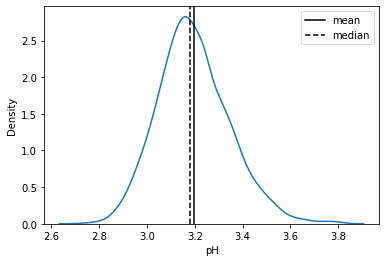

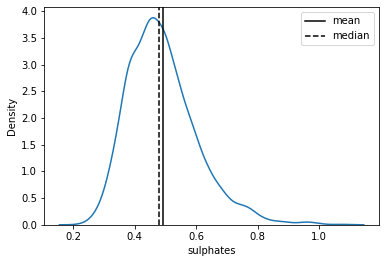

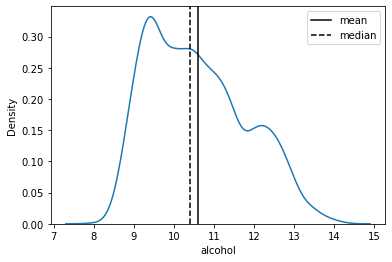

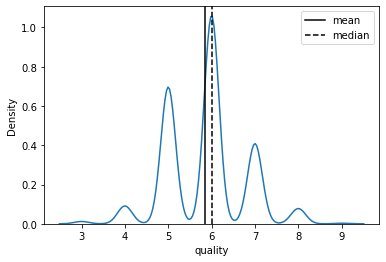

In [8]:
for column in white_wine.columns:
    plt.figure()
    sns.kdeplot(data=white_wine, x=column)
    plt.axvline(x = white_wine[column].mean(), color='black', label='mean')
    plt.axvline(x = white_wine[column].median(), color='black', linestyle='--', label='median')
    plt.legend()

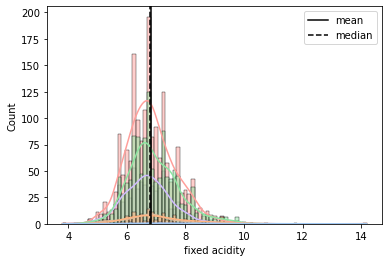

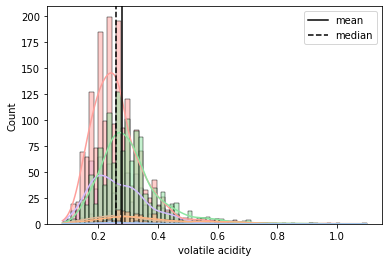

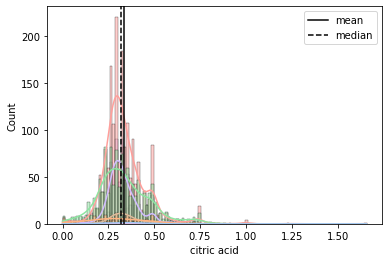

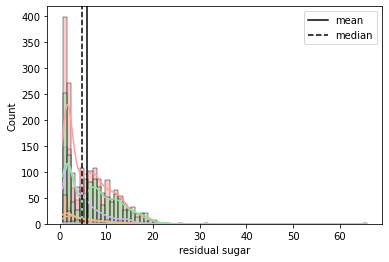

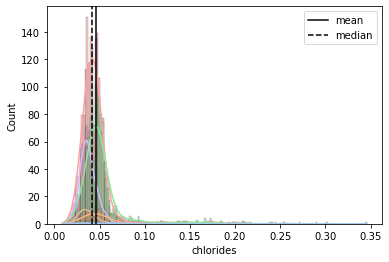

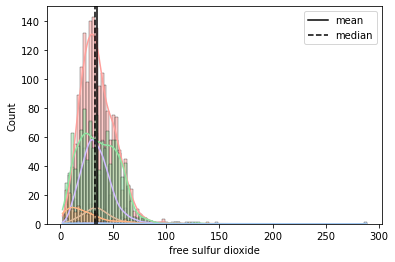

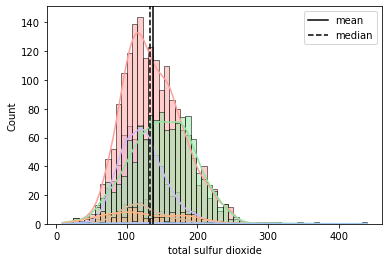

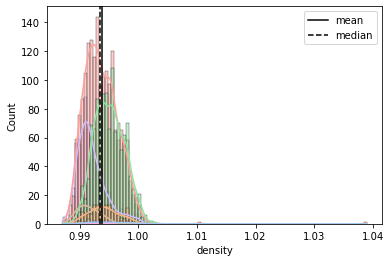

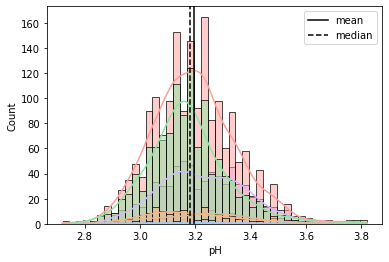

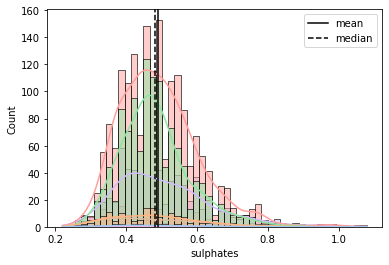

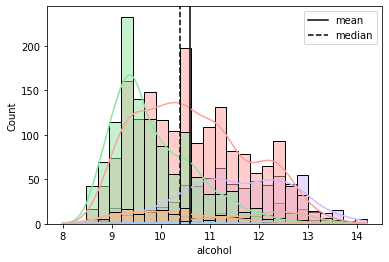

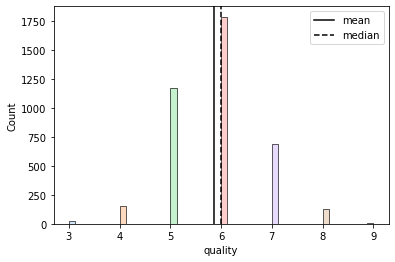

In [9]:
for column in white_wine.columns:
    plt.figure()
    sns.histplot(data=white_wine, x=column, hue='quality', kde=True, palette="pastel")
    plt.axvline(x = white_wine[column].mean(), color='black', label='mean')
    plt.axvline(x = white_wine[column].median(), color='black', linestyle='--', label='median')
    plt.legend()

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.019214     0.298959   
volatile acidity          -0.019214          1.000000    -0.163228   
citric acid                0.298959         -0.163228     1.000000   
residual sugar             0.083620          0.098340     0.106269   
chlorides                  0.024036          0.086287     0.132590   
free sulfur dioxide       -0.058396         -0.102471     0.091681   
total sulfur dioxide       0.082425          0.102315     0.122845   
density                    0.266091          0.060603     0.160076   
pH                        -0.431274         -0.046954    -0.183015   
sulphates                 -0.017453         -0.021150     0.049442   
alcohol                   -0.110788          0.046815    -0.076514   
quality                   -0.124636         -0.190678     0.007065   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

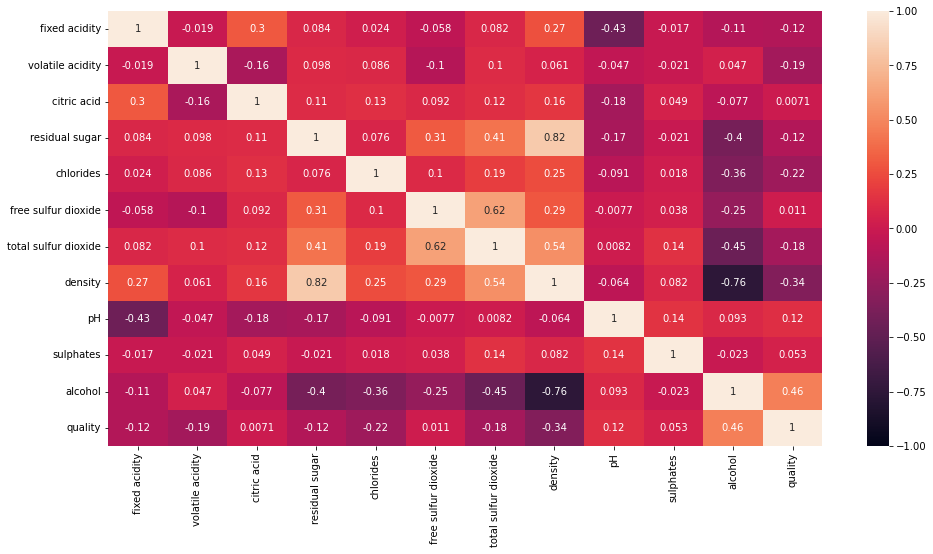

In [10]:
corr_matrix=white_wine.corr()
print(corr_matrix)
plt.figure(figsize=(16,8))

sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)
plt.show()

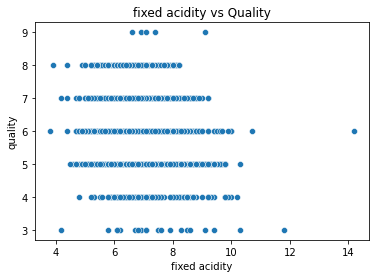

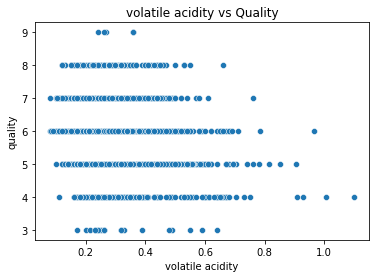

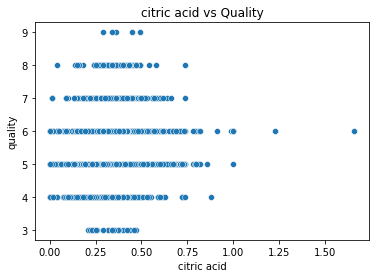

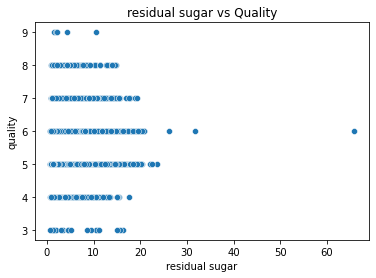

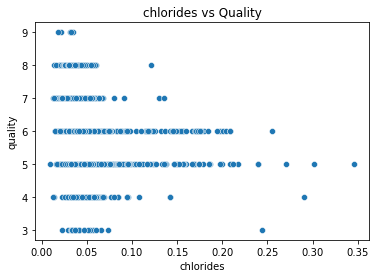

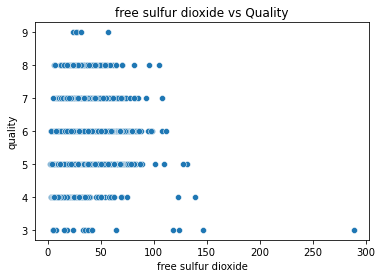

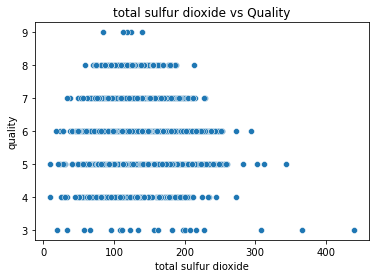

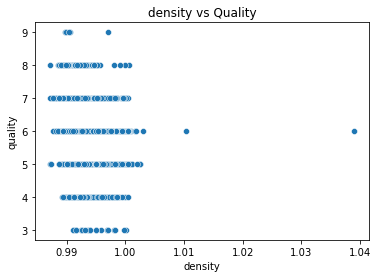

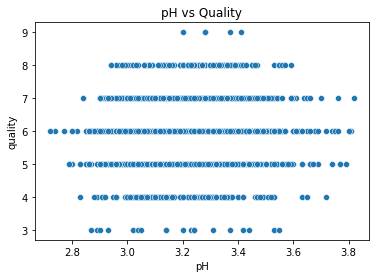

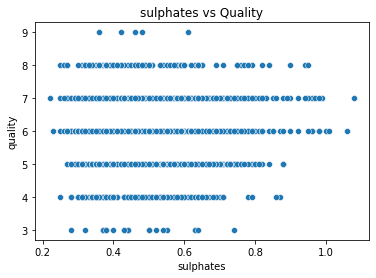

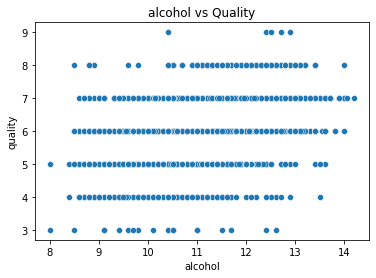

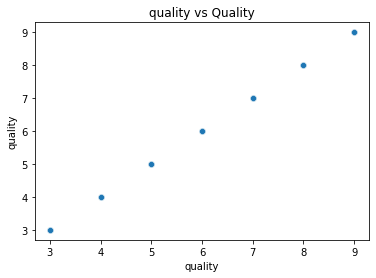

In [11]:
for column in white_wine.columns:
    sns.scatterplot(x=white_wine[column], y=white_wine['quality'])
    plt.title(f"{column} vs Quality")
    plt.show()

In [12]:
white_wines_sum = white_wine.copy(deep=True)
print(white_wines_sum.info())
white_wines_sum

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3961 entries, 0 to 3960
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3961 non-null   float64
 1   volatile acidity      3961 non-null   float64
 2   citric acid           3961 non-null   float64
 3   residual sugar        3961 non-null   float64
 4   chlorides             3961 non-null   float64
 5   free sulfur dioxide   3961 non-null   float64
 6   total sulfur dioxide  3961 non-null   float64
 7   density               3961 non-null   float64
 8   pH                    3961 non-null   float64
 9   sulphates             3961 non-null   float64
 10  alcohol               3961 non-null   float64
 11  quality               3961 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 371.5 KB
None


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
3956,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
3957,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
3958,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
3959,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [13]:
white_wines_sum['acidity']=white_wines_sum['fixed acidity']+white_wines_sum['volatile acidity']
white_wines_sum.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,acidity
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,7.27
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,6.60
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,8.38
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,7.43
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,6.52


In [14]:
white_wines_sum = white_wines_sum.drop(columns=['fixed acidity', 'volatile acidity', 'citric acid'])
white_wines_sum.head()

,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,acidity
0,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,7.27
1,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,6.60
2,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,8.38
3,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,7.43
4,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,6.52


In [15]:
white_wines_sum['sulphur compounds'] = white_wines_sum['total sulfur dioxide'] + white_wines_sum['sulphates']
white_wines_sum = white_wines_sum.drop(columns=['total sulfur dioxide', 'free sulfur dioxide', 'sulphates'])
white_wines_sum.head()

,residual sugar,chlorides,density,pH,alcohol,quality,acidity,sulphur compounds
0,20.7,0.045,1.0010,3.00,8.8,6,7.27,170.45
1,1.6,0.049,0.9940,3.30,9.5,6,6.60,132.49
2,6.9,0.050,0.9951,3.26,10.1,6,8.38,97.44
3,8.5,0.058,0.9956,3.19,9.9,6,7.43,186.40
4,7.0,0.045,0.9949,3.18,9.6,6,6.52,136.47


In [16]:
print(white_wines_sum.columns)

Index(['residual sugar', 'chlorides', 'density', 'pH', 'alcohol', 'quality',
       'acidity', 'sulphur compounds'],
      dtype='object')


In [17]:
arrange_columns = ['alcohol', 'acidity', 'residual sugar', 'sulphur compounds', 'chlorides', 'density', 'pH', 'quality',]
white_wines_sum = white_wines_sum[arrange_columns]
white_wines_sum.head()

,alcohol,acidity,residual sugar,sulphur compounds,chlorides,density,pH,quality
0,8.8,7.27,20.7,170.45,0.045,1.0010,3.00,6
1,9.5,6.60,1.6,132.49,0.049,0.9940,3.30,6
2,10.1,8.38,6.9,97.44,0.050,0.9951,3.26,6
3,9.9,7.43,8.5,186.40,0.058,0.9956,3.19,6
4,9.6,6.52,7.0,136.47,0.045,0.9949,3.18,6


                    alcohol   acidity  residual sugar  sulphur compounds  \
alcohol            1.000000 -0.104698       -0.398167          -0.446541   
acidity           -0.104698  1.000000        0.094897           0.094094   
residual sugar    -0.398167  0.094897        1.000000           0.409381   
sulphur compounds -0.446541  0.094094        0.409381           1.000000   
chlorides         -0.356928  0.034167        0.076091           0.191123   
density           -0.760162  0.272013        0.820498           0.536889   
pH                 0.093095 -0.434784       -0.165997           0.008611   
quality            0.462869 -0.146683       -0.117339          -0.183149   

                   chlorides   density        pH   quality  
alcohol            -0.356928 -0.760162  0.093095  0.462869  
acidity             0.034167  0.272013 -0.434784 -0.146683  
residual sugar      0.076091  0.820498 -0.165997 -0.117339  
sulphur compounds   0.191123  0.536889  0.008611 -0.183149  
chlorides 

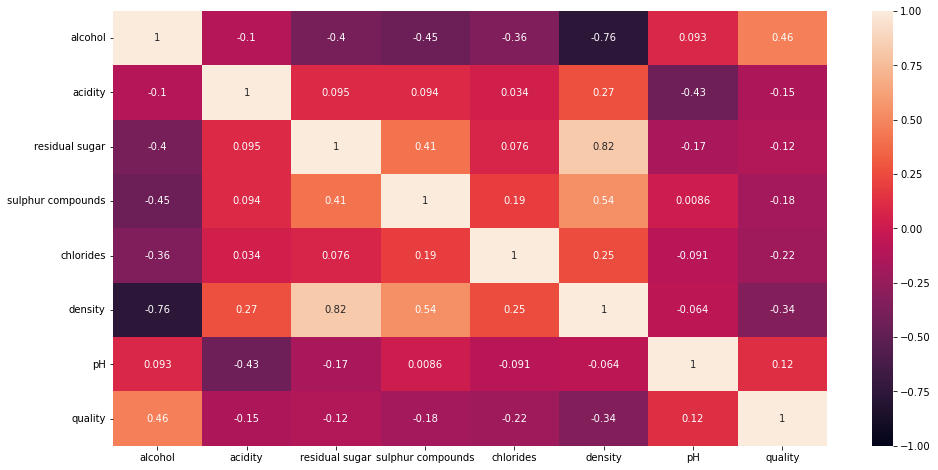

In [18]:
corr_matrix_2 =white_wines_sum.corr()
print(corr_matrix_2)
plt.figure(figsize=(16,8))

sns.heatmap(corr_matrix_2, vmin=-1, vmax=1, annot=True)
plt.show()

# Model training and fitting (all features)

In [19]:
X = white_wines_sum.drop(columns=['quality'])
y = white_wines_sum['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions= model.predict(X_test)

score = accuracy_score(y_test, predictions)
score

0.41740226986128626

In [20]:
from sklearn.naive_bayes import GaussianNB

X = white_wines_sum.drop('quality', axis=1)
y = white_wines_sum['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

score = accuracy_score(y_test, predictions)
score

0.44388398486759145

In [21]:
from sklearn.neighbors import KNeighborsClassifier

X = white_wines_sum.drop('quality', axis=1)
y = white_wines_sum['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k = 5
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

score = accuracy_score(y_test, predictions)
score

0.4262295081967213

# Model training and fitting (selected features)

## Retaining density and dropping alcohol

In [41]:
X = white_wines_sum.drop(['alcohol', 'quality'], axis=1)
y = white_wines_sum['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions= model.predict(X_test)

score = accuracy_score(y_test, predictions)
print(f'Score with a model retaining density and dropping alcohol: {score}')

Score with a model retaining density and dropping alcohol: 0.4085750315258512


In [42]:
X = white_wines_sum.drop(['alcohol', 'quality'], axis=1)
y = white_wines_sum['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

score = accuracy_score(y_test, predictions)
print(f'Score with a model retaining density and dropping alcohol: {score}')

Score with a model retaining density and dropping alcohol: 0.42370744010088274


In [44]:
X = white_wines_sum.drop(['alcohol', 'quality'], axis=1)
y = white_wines_sum['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k = 5
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

score = accuracy_score(y_test, predictions)
print(f'Score with a model retaining density and dropping alcohol: {score}')

Score with a model retaining density and dropping alcohol: 0.3871374527112232


## Retaining alcohol and dropping density

In [45]:
X = white_wines_sum.drop(['density', 'quality'], axis=1)
y = white_wines_sum['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions= model.predict(X_test)

score = accuracy_score(y_test, predictions)
print(f'Score with a model retaining density and dropping alcohol: {score}')

Score with a model retaining density and dropping alcohol: 0.4224464060529634


In [46]:
X = white_wines_sum.drop(['density', 'quality'], axis=1)
y = white_wines_sum['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

score = accuracy_score(y_test, predictions)
print(f'Score with a model retaining density and dropping alcohol: {score}')

Score with a model retaining density and dropping alcohol: 0.4728877679697352


In [48]:
X = white_wines_sum.drop(['density', 'quality'], axis=1)
y = white_wines_sum['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k = 5
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

score = accuracy_score(y_test, predictions)
print(f'Score with a model retaining density and dropping alcohol: {score}')

Score with a model retaining density and dropping alcohol: 0.4262295081967213
